In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random

In [15]:
train_img = 'data/train/images'
val_img = 'data/valid/images'
test_img = 'data/test/images'

train_lbe = 'data/train/labels'
val_lbe = 'data/valid/labels'
test_lbe = 'data/test/labels'

In [18]:
print(f'train_img: {len(os.listdir(train_img))} ')
print(f'train_lbe: {len(os.listdir(train_lbe))} ')
print(f'val_img: {len(os.listdir(val_img))} ')
print(f'val_lbe: {len(os.listdir(val_lbe))} ')
print(f'test_img: {len(os.listdir(test_img))} ')
print(f'test_lbe: {len(os.listdir(test_lbe))} ')


train_img: 7057 
train_lbe: 7057 
val_img: 2048 
val_lbe: 2048 
test_img: 1020 
test_lbe: 1020 


In [19]:
def bbox_stats(label_dir):
    widths, heights, ratios = [], [], []

    for i,file in enumerate(os.listdir(label_dir)):
        # print(i)
        if not file.endswith(".txt"):
            continue

        with open(os.path.join(label_dir, file)) as f:
            for line in f:
                _, x, y, w, h = map(float, line.split())
                widths.append(w)
                heights.append(h)
                ratios.append(w / h if h != 0 else 0)

    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1); plt.hist(widths, bins=30); plt.title("BBox Width")
    plt.subplot(1,3,2); plt.hist(heights, bins=30); plt.title("BBox Height")
    plt.subplot(1,3,3); plt.hist(ratios, bins=30); plt.title("Aspect Ratio")
    plt.show()

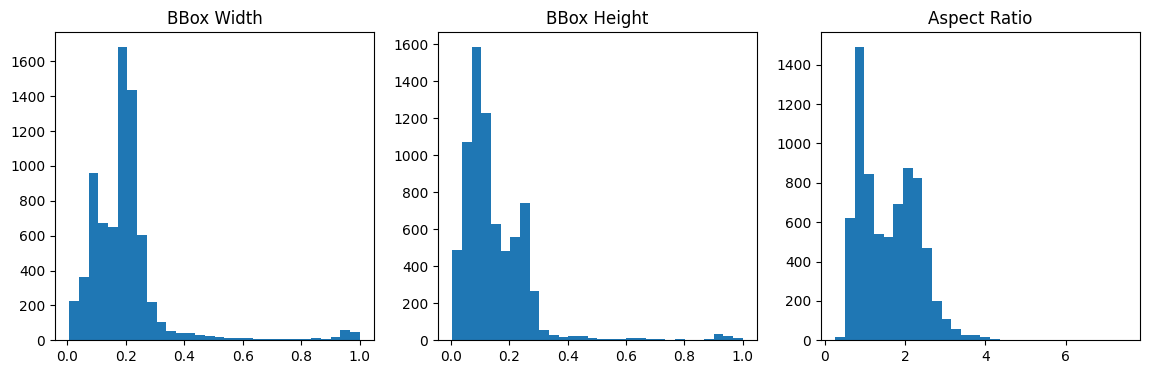

In [20]:
bbox_stats(train_lbe)

In [21]:
def image_resolutions(image_dir):
    heights, widths = [], []
    corrupted = []

    for i,img in enumerate(os.listdir(image_dir)):
        # print(i)
        path = os.path.join(image_dir, img)
        image = cv2.imread(path)

        if image is None:
            corrupted.append(img)
            continue

        h, w = image.shape[:2]
        heights.append(h)
        widths.append(w)

    print("\n Image size summary:")
    print("Min resolution:", (min(heights), min(widths)))
    print("Max resolution:", (max(heights), max(widths)))
    print("Average resolution:", (int(np.mean(heights)), int(np.mean(widths))))

    if corrupted:
        print("\n Corrupted images:", corrupted)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1); plt.hist(heights, bins=30); plt.title("Image Heights")
    plt.subplot(1,2,2); plt.hist(widths, bins=30); plt.title("Image Widths")
    plt.show()


 Image size summary:
Min resolution: (86, 90)
Max resolution: (4608, 5568)
Average resolution: (412, 581)


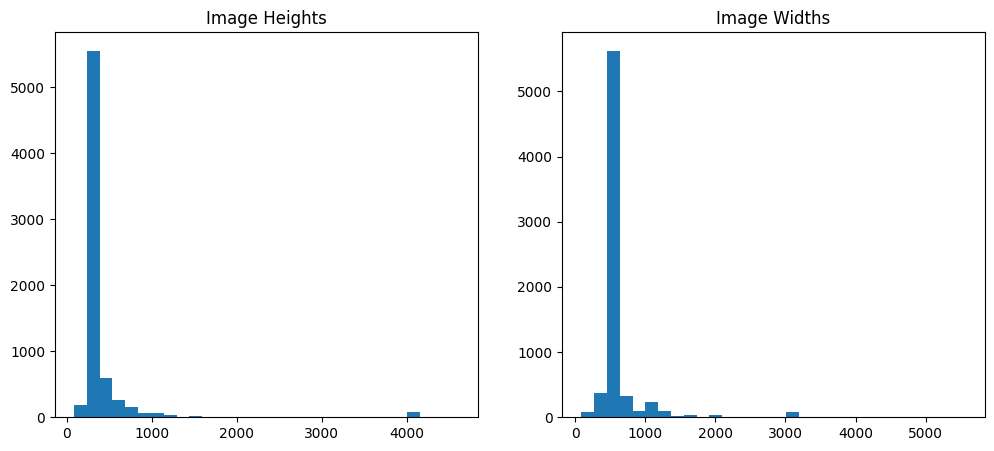

In [22]:
image_resolutions(train_img)

In [23]:
def count_boxes(label_dir):
    counts = []
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            with open(os.path.join(label_dir, file)) as f:
                lines = f.readlines()
                counts.append(len(lines))

    plt.hist(counts, bins=15)
    plt.title("Number of BBoxes per Image")
    plt.show()

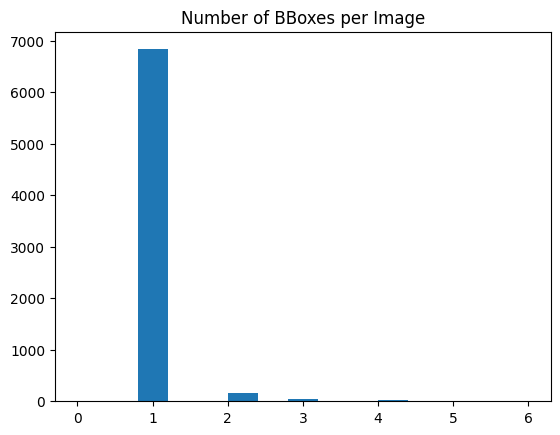

In [24]:
count_boxes(train_lbe)

In [25]:
def visualize_sample(image_dir, label_dir, n=5):
    import matplotlib.patches as patches

    image_files = os.listdir(image_dir)
    chosen = random.sample(image_files, n)

    for img_name in chosen:
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        h, w = img.shape[:2]

        fig, ax = plt.subplots(1)
        ax.imshow(img)

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    cls, xc, yc, bw, bh = map(float, line.split())

                    # Convert YOLO format to coordinates
                    x1 = int((xc - bw/2) * w)
                    y1 = int((yc - bh/2) * h)
                    box_w = int(bw * w)
                    box_h = int(bh * h)

                    rect = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2,
                                             edgecolor='lime', facecolor='none')
                    ax.add_patch(rect)

        ax.set_title(img_name)
        plt.show()

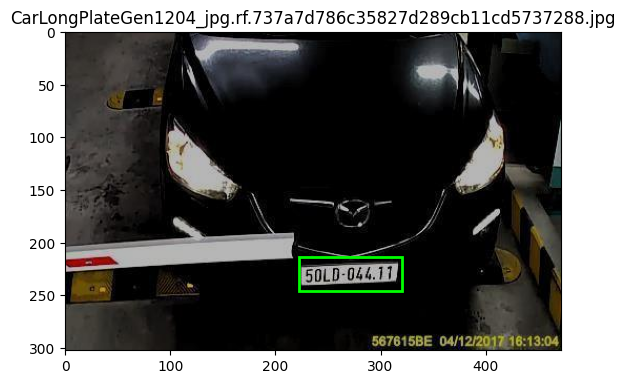

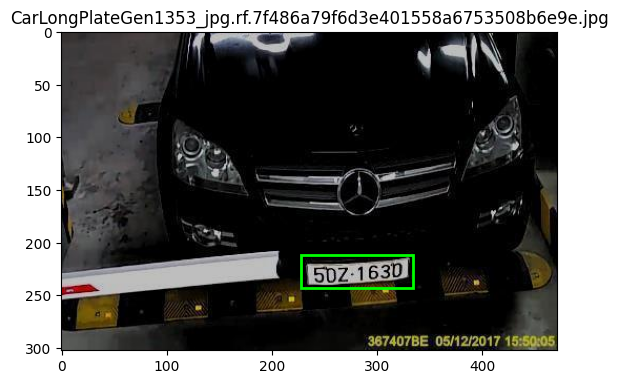

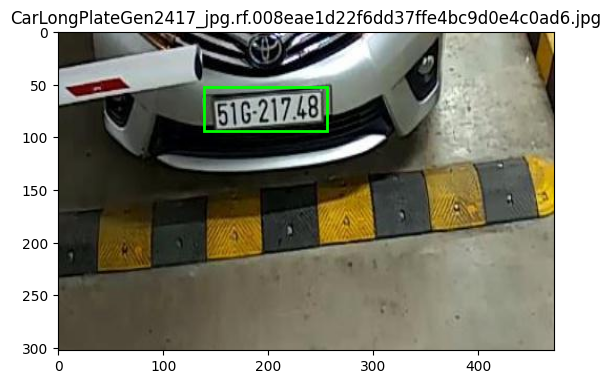

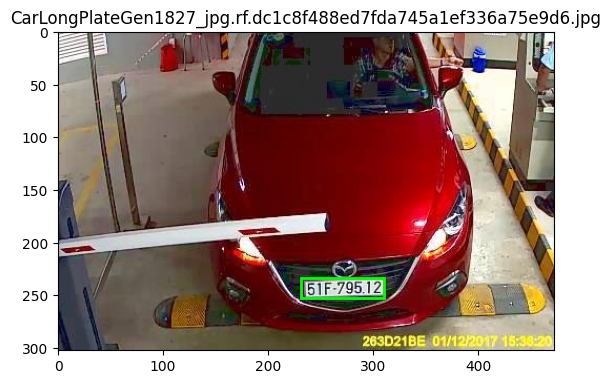

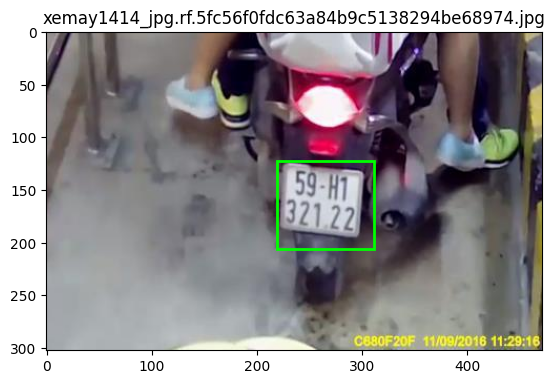

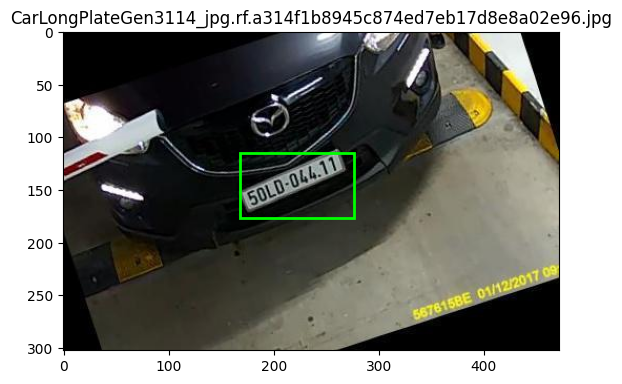

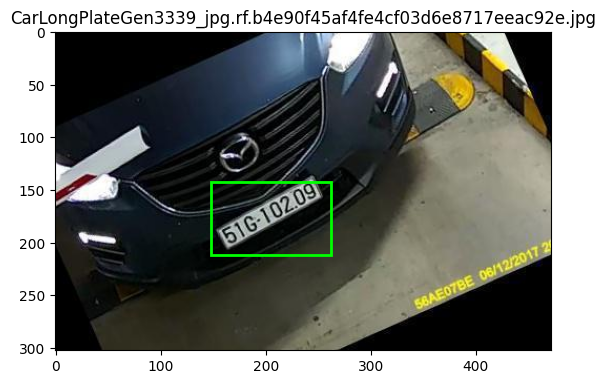

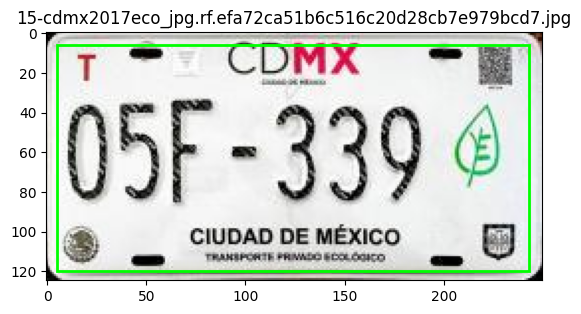

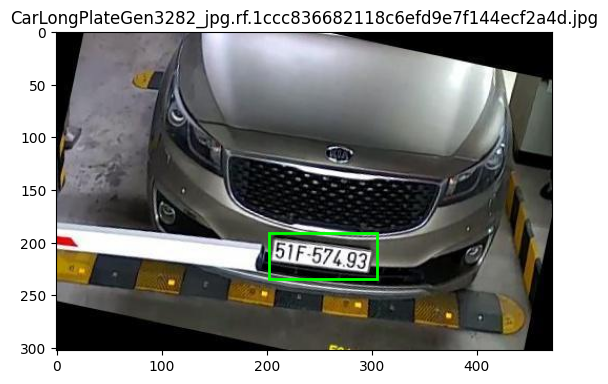

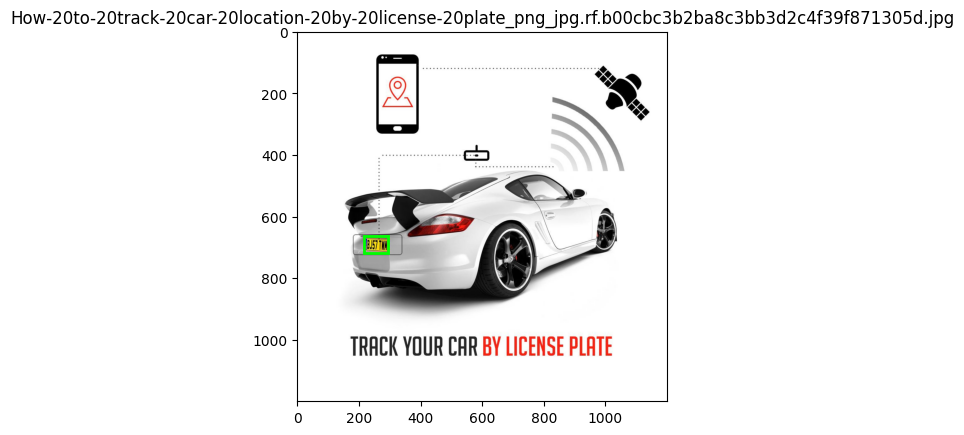

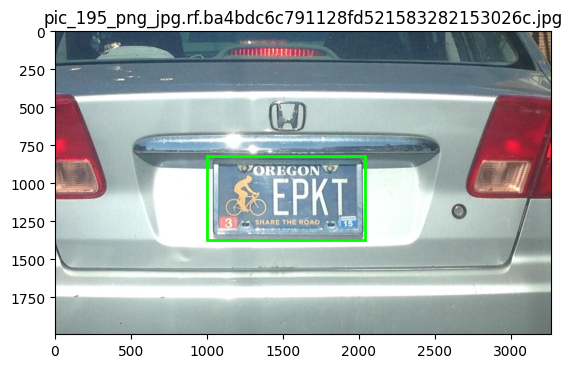

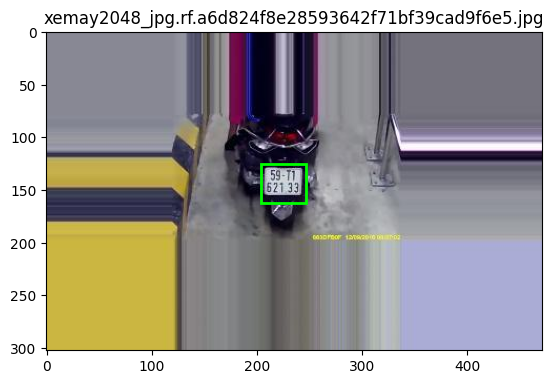

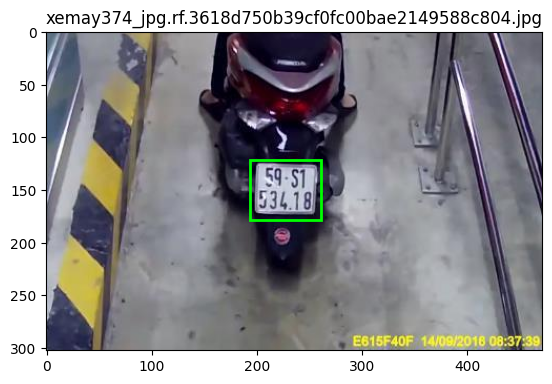

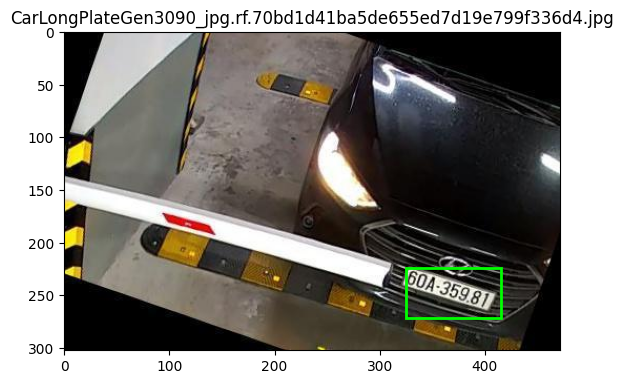

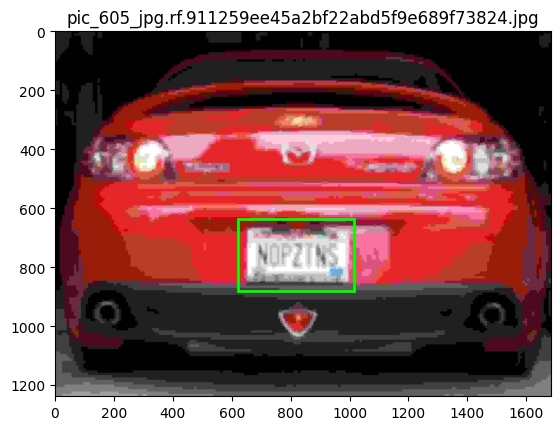

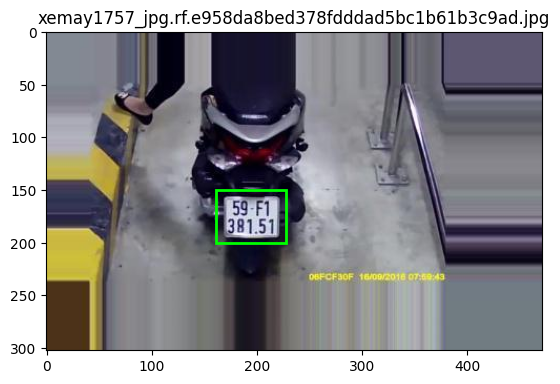

In [28]:
visualize_sample(train_img,train_lbe,n=16)